In [ ]:
!pip install -q --upgrade unstructured

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 79.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 105.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.8/195.8 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.2/304.2 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 11.7 MB/s eta 0:00:00


In [ ]:
!apt-get -qq install poppler-utils tesseract-ocr
%pip install -q --user --upgrade pillow

!pip install --quiet -U langchain-text-splitters tiktoken

!pip install --quiet -U google-generativeai

Selecting previously unselected package poppler-utils.
(Reading database ... 126111 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.8_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.8) ...
Setting up poppler-utils (22.02.0-2ubuntu0.8) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 64.8 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade nltk

In [ ]:
# Install NLTK Data
import nltk
nltk.download('punkt_tab')  # Download the correct punkt_tab resource
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
!mkdir -p pdfs
!mkdir -p images

In [ ]:
!pip install -q pi_heif
!pip install -q unstructured[local-inference] pdfminer
from unstructured.partition.pdf import partition_pdf
import os
from langchain_text_splitters import RecursiveCharacterTextSplitter
import base64
from google.colab import userdata
import google.generativeai as genai
import PIL.Image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 55.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 90.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.5/112.5 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.9/527.9 kB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 110.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 97.7 MB/s eta 0:00:00
   ━━━━━━

In [ ]:
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

text_embedding_model = "models/text-embedding-004"
text_embedding_model_for_text_splitting = "text-embedding-3-small"  # since encoding of models/text-embedding-004 isn't available yet
llm_model = 'gemini-1.5-flash'
images_folder_path = '/content/images'
pdfs_folder_path = '/content/pdfs'
extracted_pdfs = []
texts_to_embed = []
images_to_embed = []

text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    model_name=text_embedding_model_for_text_splitting,
    chunk_size=100,
    chunk_overlap=0,
)

genai.configure(api_key=GOOGLE_API_KEY)
gemini_model = genai.GenerativeModel(llm_model)


In [ ]:
for pdf_file in sorted(os.listdir(pdfs_folder_path)):
    pdf_path = os.path.join(pdfs_folder_path, pdf_file)
    print("Extracting content from PDF - " + pdf_path)
    try:
        extracted_pdfs.append({
            "chunks": partition_pdf(pdf_path,
                extract_images_in_pdf=True,
                extract_image_block_output_dir=os.path.join(images_folder_path, pdf_file)),
            "filename": pdf_file
          }
        )
    except PIL.UnidentifiedImageError as e:
        print(f"Error processing {pdf_file}: {e}")

print(f"Total PDFs processed: {len(extracted_pdfs)}")
print(f"Chunks per PDF: {[len(extracted_pdfs[i]['chunks']) for i in range(len(extracted_pdfs))]}")


Extracting content from PDF - /content/pdfs/whitepaper_Foundational Large Language models & text generation_v2.pdf


yolox_l0.05.onnx:   0%|          | 0.00/217M [00:00<?, ?B/s]

Total PDFs processed: 1
Chunks per PDF: [878]


In [ ]:
[len(extracted_pdfs[i]['chunks']) for i in range(len(extracted_pdfs))]

[878]

In [ ]:
for extracted_pdf in extracted_pdfs:
    total_chunks = len(extracted_pdf.get('chunks'))

    for index, chunk in enumerate(extracted_pdf.get('chunks')):
        print(f'Processing chunk {index+1}/{total_chunks} of {extracted_pdf.get("filename")}')

        if chunk.category != "Image":
            splitted_text = text_splitter.split_text(chunk.text)
            print(f"Splitting text into {len(splitted_text)} chunks")
            for text in splitted_text:
                embedding_response = genai.embed_content(model=text_embedding_model, content=text)
                embedding = embedding_response.get('embedding')
                if embedding is None:
                    print(f"No embedding returned for text: {text[:100]}")  # Print first 100 characters for debugging
                else:
                    texts_to_embed.append({
                        "type": "text",
                        "filename": extracted_pdf.get('filename'),
                        "text": text,
                        "embedding": embedding
                    })
            print(f"Total text embeddings added: {len(texts_to_embed)}")


Processing chunk 1/878 of whitepaper_Foundational Large Language models & text generation_v2.pdf
Splitting text into 1 chunks
Total text embeddings added: 1
Processing chunk 2/878 of whitepaper_Foundational Large Language models & text generation_v2.pdf
Splitting text into 1 chunks
Total text embeddings added: 2
Processing chunk 3/878 of whitepaper_Foundational Large Language models & text generation_v2.pdf
Splitting text into 1 chunks
Total text embeddings added: 3
Processing chunk 4/878 of whitepaper_Foundational Large Language models & text generation_v2.pdf
Splitting text into 1 chunks
Total text embeddings added: 4
Processing chunk 5/878 of whitepaper_Foundational Large Language models & text generation_v2.pdf
Splitting text into 1 chunks
Total text embeddings added: 5
Processing chunk 6/878 of whitepaper_Foundational Large Language models & text generation_v2.pdf
Processing chunk 7/878 of whitepaper_Foundational Large Language models & text generation_v2.pdf
Processing chunk 8/87

In [ ]:
# texts_to_embed
print(len(texts_to_embed))


945


In [ ]:
# creating both a textual description (for embedding and similarity search) and storing the original image data (for potential display alongside search results)
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

for folder in sorted(os.listdir(images_folder_path)):
    file_imgs_folder = os.path.join(images_folder_path, folder)
    print(f"Processing images in folder: {file_imgs_folder}")

    for img_file in sorted(os.listdir(file_imgs_folder)):
        encoded_image = encode_image(os.path.join(file_imgs_folder, img_file))

        print("Summarizing & embedding image - " + os.path.join(file_imgs_folder, img_file))
        raw_img = PIL.Image.open(os.path.join(file_imgs_folder, img_file))
        gemini_res = gemini_model.generate_content(["Give a brief description of attached image to store it in Vector Database for RAG Search within 100 tokens. Also specify its an image so that RAG can understand its an image description", raw_img])
        if gemini_res.text is None:
            print(f"No description generated for image: {img_file}")
        else:
            embedding_response = genai.embed_content(model=text_embedding_model, content=gemini_res.text)
            embedding = embedding_response.get('embedding')
            if embedding is None:
                print(f"No embedding returned for image description: {gemini_res.text[:100]}")
            else:
                images_to_embed.append({
                    "type": "image",
                    "base64_image": encoded_image,
                    "filename": folder,
                    "text": gemini_res.text,
                    "embedding": embedding
                })
        print(f"Total image embeddings added: {len(images_to_embed)}")


Processing images in folder: /content/images/whitepaper_Foundational Large Language models & text generation_v2.pdf
Summarizing & embedding image - /content/images/whitepaper_Foundational Large Language models & text generation_v2.pdf/figure-1-1.jpg
Total image embeddings added: 1
Summarizing & embedding image - /content/images/whitepaper_Foundational Large Language models & text generation_v2.pdf/figure-1-2.jpg
Total image embeddings added: 2
Summarizing & embedding image - /content/images/whitepaper_Foundational Large Language models & text generation_v2.pdf/figure-10-5.jpg
Total image embeddings added: 3
Summarizing & embedding image - /content/images/whitepaper_Foundational Large Language models & text generation_v2.pdf/figure-13-6.jpg
Total image embeddings added: 4
Summarizing & embedding image - /content/images/whitepaper_Foundational Large Language models & text generation_v2.pdf/figure-14-7.jpg
Total image embeddings added: 5
Summarizing & embedding image - /content/images/whi

In [ ]:
images_to_embed[0]["text"]
# print(len(images_to_embed))

'Image of a multifaceted, iridescent object, possibly glass or crystal sculpture.  Colors range from deep purple to light blue, with a gray top edge. The object is angular and geometric.  The image includes text mentioning names: Mankowitz, Mascaro, and Gulli.\n'

In [ ]:
import faiss
import numpy as np

def create_faiss_index(embedding_dimension):
    # Create a FAISS index for L2 distance
    index = faiss.IndexFlatL2(embedding_dimension)
    return index

def add_embeddings_to_faiss(index, embeddings):
    # Convert embeddings list to numpy array
    if not embeddings:
        print("No embeddings to add to FAISS index")
        return

    embedding_dimension = len(embeddings[0]['embedding'])
    embedding_matrix = np.array([e['embedding'] for e in embeddings], dtype=np.float32)

    # Check if all embeddings have the same dimension
    if embedding_matrix.shape[1] != embedding_dimension:
        print(f"Mismatch in embedding dimensions: {embedding_matrix.shape[1]} vs {embedding_dimension}")
        return

    # Add embeddings to the index
    index.add(embedding_matrix)

# Create FAISS indices for text and images
text_embedding_dimension = len(texts_to_embed[0]['embedding']) if texts_to_embed else 0
image_embedding_dimension = len(images_to_embed[0]['embedding']) if images_to_embed else 0

text_index = create_faiss_index(text_embedding_dimension) if text_embedding_dimension > 0 else None
image_index = create_faiss_index(image_embedding_dimension) if image_embedding_dimension > 0 else None

# Add embeddings to the indices
if text_index:
    add_embeddings_to_faiss(text_index, texts_to_embed)
    print(f"Text embeddings added to FAISS index. Total count: {len(texts_to_embed)}")

if image_index:
    add_embeddings_to_faiss(image_index, images_to_embed)
    print(f"Image embeddings added to FAISS index. Total count: {len(images_to_embed)}")

# Save FAISS indices to files
faiss.write_index(text_index, 'text_embeddings.index') if text_index else print("No text index to save")
faiss.write_index(image_index, 'image_embeddings.index') if image_index else print("No image index to save")


Text embeddings added to FAISS index. Total count: 945
Image embeddings added to FAISS index. Total count: 17


In [ ]:
# Load FAISS indices from files
loaded_text_index = faiss.read_index('text_embeddings.index') if os.path.exists('text_embeddings.index') else None
loaded_image_index = faiss.read_index('image_embeddings.index') if os.path.exists('image_embeddings.index') else None

if loaded_text_index:
    print("Text embeddings index loaded successfully")

if loaded_image_index:
    print("Image embeddings index loaded successfully")


Text embeddings index loaded successfully
Image embeddings index loaded successfully


Query: What is transformer?
Answer: A transformer is a model that processes various input sequences (like text, audio, image, video) by converting them into embeddings, processing them, and then decoding them into outputs (like image and text).




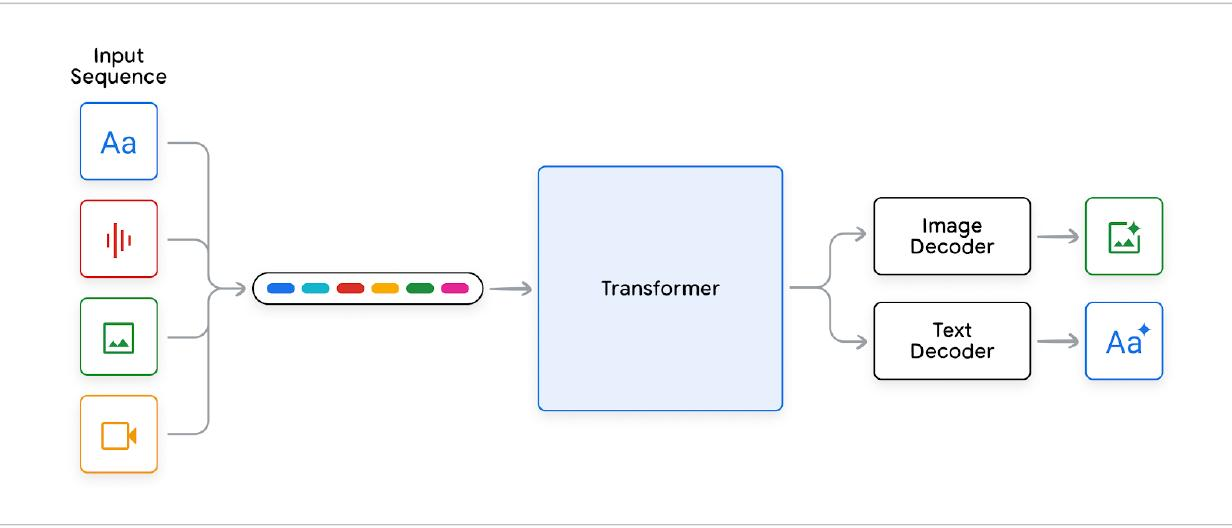

In [ ]:
import base64
import io
from IPython.display import display, HTML
import PIL.Image
import numpy as np
import faiss

# Function to encode user query
def encode_query(query, model):
    return model.embed_content(model=text_embedding_model, content=query)['embedding']

# Function to retrieve the most relevant embedding index
def retrieve_relevant_embedding_index(index, query_embedding):
    # Convert query embedding to numpy array and reshape
    query_embedding_np = np.array([query_embedding], dtype=np.float32)

    # Use FAISS search method directly
    distances, indices = index.search(query_embedding_np, k=1)
    return indices[0][0] if indices[0].size > 0 else None

# Function to get the relevant text and image
def get_relevant_text_and_image(text_index, image_index, texts, images):
    relevant_text = texts[text_index] if text_index is not None and text_index < len(texts) else None
    relevant_image = images[image_index] if image_index is not None and image_index < len(images) else None
    return relevant_text, relevant_image

# Example user query
user_query =  "What is transformer?"
query_embedding = encode_query(user_query, genai)

# Retrieve the most relevant text and image embeddings
text_index = retrieve_relevant_embedding_index(loaded_text_index, query_embedding) if loaded_text_index else None
image_index = retrieve_relevant_embedding_index(loaded_image_index, query_embedding) if loaded_image_index else None

# Extract relevant text and image
relevant_text, relevant_image = get_relevant_text_and_image(text_index, image_index, texts_to_embed, images_to_embed)

# Prepare the prompt for the LLM
texts_to_llm = [relevant_text['text']] if relevant_text else []
image_summaries_to_llm = [relevant_image['text']] if relevant_image else []
base64_images_to_user_query = [relevant_image['base64_image']] if relevant_image else []

llm_prompt = f"""
Here are some relevant passages I found about {user_query}:

{texts_to_llm}

Additionally, these are image summaries found related to the same query:

{image_summaries_to_llm}

Based on the information above, can you provide a short and crisp response to the query?
"""

# Generate content using the model
response_to_user = gemini_model.generate_content([llm_prompt])

# Prepare HTML for displaying images
images_html = ""
for image_base64 in base64_images_to_user_query:
    image_data = base64.b64decode(image_base64)
    image = PIL.Image.open(io.BytesIO(image_data))
    image_url = io.BytesIO()
    image.save(image_url, format='PNG')
    image_url.seek(0)
    image_html = f'<img src="data:image/png;base64,{base64.b64encode(image_url.getvalue()).decode()}" width="300"/>'
    images_html += image_html

# Display results
print("Query: " + user_query)
print("Answer: " + response_to_user.text)
display(HTML(images_html))


Query: Explain Transformer Architecture in great detail?
Answer: The Transformer architecture uses an encoder-decoder structure.  The encoder processes input (e.g., a French sentence) through multiple layers of self-attention and feed-forward networks.  The decoder, similarly layered, uses both self-attention and encoder-decoder attention to generate the output (e.g., the English translation).  Add & norm operations are used throughout for normalization and residual connections.  Multi-head attention allows the model to attend to different parts of the input sequence simultaneously.




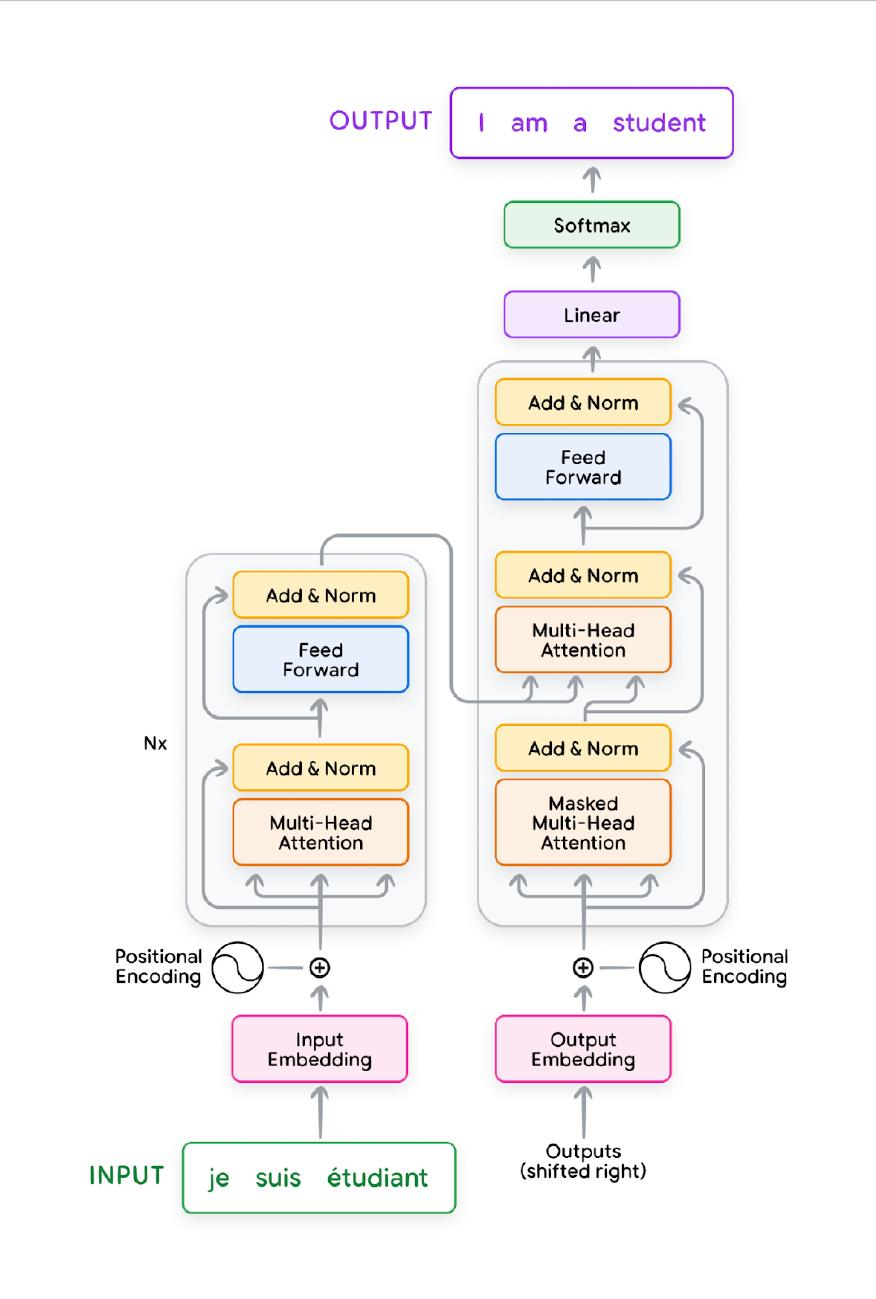

In [ ]:
import base64
import io
from IPython.display import display, HTML
import PIL.Image
import numpy as np
import faiss

# Function to encode user query
def encode_query(query, model):
    return model.embed_content(model=text_embedding_model, content=query)['embedding']

# Function to retrieve the most relevant embedding index
def retrieve_relevant_embedding_index(index, query_embedding):
    # Convert query embedding to numpy array and reshape
    query_embedding_np = np.array([query_embedding], dtype=np.float32)

    # Use FAISS search method directly
    distances, indices = index.search(query_embedding_np, k=1)
    return indices[0][0] if indices[0].size > 0 else None

# Function to get the relevant text and image
def get_relevant_text_and_image(text_index, image_index, texts, images):
    relevant_text = texts[text_index] if text_index is not None and text_index < len(texts) else None
    relevant_image = images[image_index] if image_index is not None and image_index < len(images) else None
    return relevant_text, relevant_image

# Example user query
user_query =  "Explain Transformer Architecture in great detail?"
query_embedding = encode_query(user_query, genai)

# Retrieve the most relevant text and image embeddings
text_index = retrieve_relevant_embedding_index(loaded_text_index, query_embedding) if loaded_text_index else None
image_index = retrieve_relevant_embedding_index(loaded_image_index, query_embedding) if loaded_image_index else None

# Extract relevant text and image
relevant_text, relevant_image = get_relevant_text_and_image(text_index, image_index, texts_to_embed, images_to_embed)

# Prepare the prompt for the LLM
texts_to_llm = [relevant_text['text']] if relevant_text else []
image_summaries_to_llm = [relevant_image['text']] if relevant_image else []
base64_images_to_user_query = [relevant_image['base64_image']] if relevant_image else []

llm_prompt = f"""
Here are some relevant passages I found about {user_query}:

{texts_to_llm}

Additionally, these are image summaries found related to the same query:

{image_summaries_to_llm}

Based on the information above, can you provide a short and crisp response to the query?
"""

# Generate content using the model
response_to_user = gemini_model.generate_content([llm_prompt])

# Prepare HTML for displaying images
images_html = ""
for image_base64 in base64_images_to_user_query:
    image_data = base64.b64decode(image_base64)
    image = PIL.Image.open(io.BytesIO(image_data))
    image_url = io.BytesIO()
    image.save(image_url, format='PNG')
    image_url.seek(0)
    image_html = f'<img src="data:image/png;base64,{base64.b64encode(image_url.getvalue()).decode()}" width="300"/>'
    images_html += image_html

# Display results
print("Query: " + user_query)
print("Answer: " + response_to_user.text)
display(HTML(images_html))
